In [1]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import asyncio
import numpy as np


LOG.propagate = False

In [2]:
# Get ArtemisBLEController object
ble = get_ble_controller()

In [4]:
# Connect to the Artemis Device
ble.connect()

2022-03-30 16:43:39,207 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:A5:6D:02:3C


Exception: Could not find device with address: C0:83:A5:6D:02:3C and service uuid: 4a7c2101-7d65-4814-81a2-7df8ecf23609

In [27]:
# Instantiate RobotControl class
from controller import *
rc = RobotControl(ble)

In [17]:
# Get sensor readings
rc.get_imu()

In [5]:
rc.get_tof()

In [28]:
rc.start_pid()

In [29]:
rc.stop_pid()

In [7]:
rc.toggle_debug()

In [13]:
# Move forward for 3 seconds and get readings
rc.move_forward(150)
LOG.info("IMU Reading: " + str(rc.latest_imu_reading))
time.sleep(0.5)
rc.stop()

rc.get_imu()
LOG.info("IMU Reading: " + str(rc.latest_imu_reading))

2022-03-30 16:04:35,510 | INFO     |: IMU Reading: 0.161,0.347,0.897,0.0,0.1,0.2,0.246,0.980,1.154,0.27
2022-03-30 16:04:36,261 | INFO     |: IMU Reading: 0.270,-1.343,0.444,0.186,0.87,0.5,0.309,0.989,1.67,0.26


In [17]:
rc.front_tof_readings

deque([(374.0, '0.3'),
       (384.0, '0.5'),
       (378.0, '0.7'),
       (384.0, '0.8'),
       (375.0, '0.9'),
       (379.0, '1.0'),
       (382.0, '1.1'),
       (370.0, '1.3'),
       (368.0, '1.4'),
       (360.0, '1.5'),
       (386.0, '1.6'),
       (377.0, '1.7'),
       (372.0, '1.8'),
       (377.0, '2.0'),
       (371.0, '2.1'),
       (380.0, '2.2'),
       (389.0, '2.3'),
       (367.0, '2.5'),
       (368.0, '2.6'),
       (377.0, '2.7'),
       (365.0, '2.8'),
       (382.0, '3.0'),
       (379.0, '3.9'),
       (377.0, '4.1'),
       (369.0, '4.3'),
       (370.0, '4.5'),
       (369.0, '4.7'),
       (379.0, '4.9'),
       (362.0, '5.0'),
       (363.0, '5.2'),
       (386.0, '5.4'),
       (382.0, '5.6'),
       (379.0, '5.7'),
       (365.0, '5.9'),
       (385.0, '6.1'),
       (367.0, '6.2'),
       (373.0, '6.4'),
       (379.0, '6.6'),
       (377.0, '6.8'),
       (363.0, '6.9'),
       (373.0, '7.0'),
       (363.0, '7.2'),
       (375.0, '7.4'),
       (360

In [16]:
rc.sensor_arr = None

In [38]:
rc.log_data()

array([[3.400e+00, 7.100e+01,       nan, ...,       nan,       nan,
              nan],
       [3.600e+00, 6.800e+01,       nan, ...,       nan,       nan,
              nan],
       [3.800e+00, 6.500e+01,       nan, ...,       nan,       nan,
              nan],
       ...,
       [1.039e+02,       nan, 1.687e+03, ..., 9.000e-01, 9.910e-01,
        2.600e-01],
       [1.040e+02,       nan, 1.684e+03, ...,       nan,       nan,
              nan],
       [1.041e+02,       nan, 1.688e+03, ..., 8.990e-01, 9.910e-01,
        2.600e-01]])

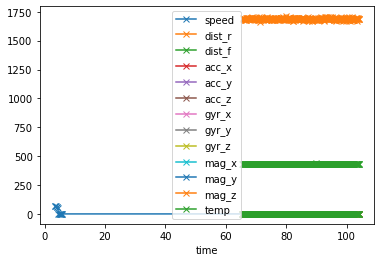

2022-03-30 16:40:35,362 | INFO     |: Disconnected from 52193D96-8201-1734-7C37-789D2C19BBD9


In [39]:
plot_time_series_data(rc.sensor_arr)

In [17]:
rc.ble.receive_float(rc.ble.uuid["RX_TOF_RIGHT"])

495.0

In [14]:
rc.ble.receive_float(rc.ble.uuid["RX_TOF_FRONT"])

676.0

In [ ]:
while True:
    ###### Your code ######
    # Ex: Move the robot for 1 sec
    rc.move_forward(50)
    await asyncio.sleep(1)
    rc.stop()
    
    # Process notify events
    # Sleep the current execution so that the notify callback functions can run
    # The sleep time can be much smaller, but it depends on the OS, hardware specs, number of notify events and the system load
    await asyncio.sleep(0.1)

In [26]:
ble.disconnect()

2022-03-23 15:06:07,951 | INFO     |: Disconnected from 52193D96-8201-1734-7C37-789D2C19BBD9
